# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import json 
import ipympl
# %matplotlib
from pylab import rcParams
import math

## Converting JSON to CSV

In [2]:
with open('clusteringDB.json') as json_file: 
    data = json.load(json_file)
    
cluster_data = data['DB']
clusteringDB = open('clusteringDB.csv', 'w')
csv_writer = csv.writer(clusteringDB)
count = 0
  
for x in cluster_data: 
    if count == 0: 
  
        header = x.keys() 
        csv_writer.writerow(header) 
        count += 1
   
    csv_writer.writerow(x.values()) 
  
clusteringDB.close() 

## Reading Data

In [3]:
df=pd.read_csv('clusteringDB.csv')
df.head()
# df.dropna(axis=0,how='any',subset=['lat','long'],inplace=True)

,lat,long,disease,diseased
0,12.34567,98.76543,Blackleg,True
1,12.34765,93.76543,Blackleg,True
2,14.34567,98.86543,Enterotoxaemia (pulpy kidney),True
3,12.34444,98.01010,Classical swine fever,True
4,10.34567,100.76543,Azurskey's,True


In [4]:
X=df.loc[:,['disease','lat','long']]
X

,disease,lat,long
0,Blackleg,12.34567,98.76543
1,Blackleg,12.34765,93.76543
2,Enterotoxaemia (pulpy kidney),14.34567,98.86543
3,Classical swine fever,12.34444,98.01010
4,Azurskey's,10.34567,100.76543
5,Blackleg,21.34567,80.76543
6,Azurskey's,18.34507,90.70543
7,Classical swine fever,12.00000,98.42424
8,Enterotoxaemia (pulpy kidney),25.87875,92.79543
9,Blackleg,17.34567,91.76543


In [5]:
count = X['disease'].nunique()
# df['hID'].nunique()
count

4

## Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
dfle = X
dfle.disease = le.fit_transform(dfle.disease)
dfle

,disease,lat,long
0,1,12.34567,98.76543
1,1,12.34765,93.76543
2,3,14.34567,98.86543
3,2,12.34444,98.01010
4,0,10.34567,100.76543
5,1,21.34567,80.76543
6,0,18.34507,90.70543
7,2,12.00000,98.42424
8,3,25.87875,92.79543
9,1,17.34567,91.76543


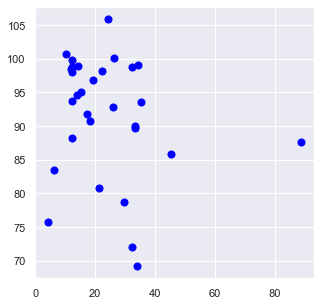

In [8]:
# ax = dfle.plot.scatter(x='lat', y='long', color='DarkGreen',s = 0);
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(dfle['lat'],dfle['long'],color='blue',s=50)

In [9]:
# from sklearn.preprocessing import StandardScaler
# X = dfle.values[:,1:]
# X = np.nan_to_num(X)
# Clus_dataSet = StandardScaler().fit_transform(X)
# Clus_dataSet

## K-Means Clustering
### Elbow Curve

In [10]:
dist_points_from_cluster_center = []
K = range(1,10)
for no_of_clusters in K:
    k_model = KMeans(n_clusters = no_of_clusters)
    k_model.fit(dfle[dfle.columns[1:3]])
    dist_points_from_cluster_center.append(k_model.inertia_)

In [11]:
dist_points_from_cluster_center

[9827.475628739803,
 5419.770850100262,
 2782.736547443421,
 1794.450246840685,
 1190.2585793969274,
 814.4213892539188,
 640.53077759423,
 510.4963235122666,
 367.7822573954549]

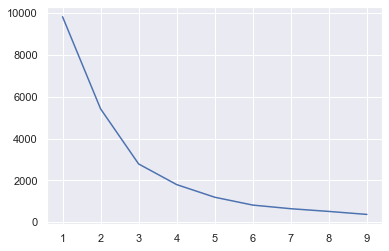

In [12]:
plt.plot(K,dist_points_from_cluster_center)

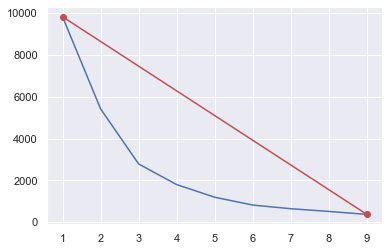

In [13]:
plt.plot(K,dist_points_from_cluster_center)
plt.plot([K[0],K[8]], [dist_points_from_cluster_center[0],dist_points_from_cluster_center[8]],'ro-')
plt.show()

In [14]:
#Function to find distance between a point and a line
def calc_distance(x1,y1,a,b,c):
    d = abs((a*x1 + b*y1 +c))/(math.sqrt(a*a + b*b))
    return d

In [15]:
a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[8]
b = K[8] - K[0]
c1 = K[0]*dist_points_from_cluster_center[8]
c2 = K[8]*dist_points_from_cluster_center[0]
c = c1-c2

In [16]:
distance_of_points_from_line = []
for k in range(9):
    distance_of_points_from_line.append(
    calc_distance(K[k], dist_points_from_cluster_center[k],a,b,c))

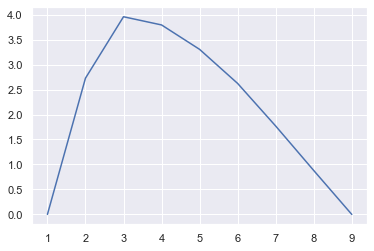

In [17]:
plt.plot(K,distance_of_points_from_line)

In [18]:
optimum_k = distance_of_points_from_line.index(max(distance_of_points_from_line)) + 1

In [19]:
optimum_k

3

## Applying Algorithm

In [20]:
kmeans = KMeans(n_clusters = optimum_k, init ='k-means++')
kmeans.fit(dfle[dfle.columns[1:3]])
dfle['cluster_label'] = kmeans.fit_predict(dfle[dfle.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
y = kmeans.fit_predict(dfle[dfle.columns[1:3]])

In [21]:
labels

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 2, 1])

In [22]:
centers

array([[14.77195222, 94.93778   ],
       [32.46830364, 86.38959636],
       [88.88887   , 87.65472   ]])

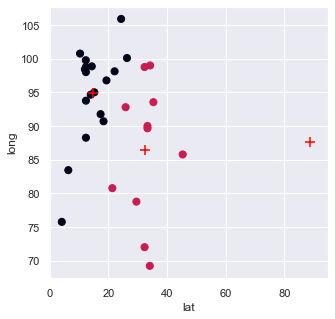

In [23]:
# plt.style.use(['dark_background'])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(dfle['lat'],dfle['long'],c=labels,s=50)
for i,j in centers:
    ax.scatter(i,j,s=100,c='red',marker='+')
ax.set_xlabel('lat')
ax.set_ylabel('long')
# plt.colorbar(scatter)

plt.show()

In [24]:
import json

data = centers
list = [{"latitude": x[0], "longitude": x[1]} for x in data]

output = json.dumps(list)

In [25]:
output

'[{"latitude": 14.771952222222222, "longitude": 94.93778}, {"latitude": 32.468303636363636, "longitude": 86.38959636363637}, {"latitude": 88.88887, "longitude": 87.65472}]'

In [26]:
with open('result.json', 'w') as outfile:
    json.dump(output, outfile,indent = 4)